In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
metro = pd.read_json('https://data.police.uk/api/stops-force?force=metropolitan')

In [58]:
metro.head(3)

,age_range,outcome,involved_person,self_defined_ethnicity,gender,legislation,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,outcome_object,location,operation,officer_defined_ethnicity,type,operation_name,object_of_search
0,25-34,Arrest,True,Mixed/Multiple ethnic groups - White and Black...,Male,Misuse of Drugs Act 1971 (section 23),NaN,2020-02-01 19:50:00+00:00,NaN,"{'id': 'bu-arrest', 'name': 'Arrest'}",None,False,Black,Person and Vehicle search,NaN,Controlled drugs
1,18-24,A no further action disposal,True,White - Any other White background,Male,Police and Criminal Evidence Act 1984 (section 1),NaN,2020-02-05 11:00:00+00:00,NaN,"{'id': 'bu-no-further-action', 'name': 'A no f...",None,False,White,Person search,NaN,Evidence of offences under the Act
2,25-34,Community resolution,True,White - Any other White background,Male,Misuse of Drugs Act 1971 (section 23),NaN,2020-02-17 15:00:00+00:00,NaN,"{'id': 'bu-community-resolution', 'name': 'Com...","{'latitude': '51.570081', 'street': {'id': 975...",False,White,Person search,NaN,Controlled drugs


In [59]:
metro.columns

Index(['age_range', 'outcome', 'involved_person', 'self_defined_ethnicity',
       'gender', 'legislation', 'outcome_linked_to_object_of_search',
       'datetime', 'removal_of_more_than_outer_clothing', 'outcome_object',
       'location', 'operation', 'officer_defined_ethnicity', 'type',
       'operation_name', 'object_of_search'],
      dtype='object')

In [60]:
metro.legislation.value_counts()

Misuse of Drugs Act 1971 (section 23)                      14114
Police and Criminal Evidence Act 1984 (section 1)           8701
Criminal Justice and Public Order Act 1994 (section 60)      510
Firearms Act 1968 (section 47)                               119
Name: legislation, dtype: int64

In [61]:
metro.officer_defined_ethnicity.value_counts()

White    9097
Black    8982
Asian    3867
Other     995
Name: officer_defined_ethnicity, dtype: int64

In [63]:
metro.officer_defined_ethnicity.fillna('None Given', inplace=True)

In [65]:
metro[metro.legislation.str.contains('Fire')].officer_defined_ethnicity.value_counts()

Black         56
White         34
Asian         20
None Given     8
Other          1
Name: officer_defined_ethnicity, dtype: int64

In [51]:
metro.officer_defined_ethnicity.fillna('None Given', inplace=True)

In [66]:
len(metro[metro.legislation.str.contains('Fire')])

119

In [71]:
metro[metro.legislation.str.contains('Fire')].head()

,age_range,outcome,involved_person,self_defined_ethnicity,gender,legislation,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,outcome_object,location,operation,officer_defined_ethnicity,type,operation_name,object_of_search
37,18-24,A no further action disposal,True,Black/African/Caribbean/Black British - African,Female,Firearms Act 1968 (section 47),NaN,2020-02-06 20:40:00+00:00,NaN,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '51.514868', 'street': {'id': 956...",False,Black,Person search,NaN,Firearms
196,25-34,A no further action disposal,True,White - Any other White background,Female,Firearms Act 1968 (section 47),NaN,2020-02-08 20:45:00+00:00,NaN,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '51.516120', 'street': {'id': 956...",False,White,Person search,NaN,Firearms
258,25-34,A no further action disposal,True,White - English/Welsh/Scottish/Northern Irish/...,Male,Firearms Act 1968 (section 47),NaN,2020-02-17 16:58:00+00:00,NaN,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '51.519227', 'street': {'id': 960...",False,White,Person search,NaN,Firearms
519,25-34,A no further action disposal,True,White - Any other White background,Male,Firearms Act 1968 (section 47),NaN,2020-02-28 09:09:00+00:00,NaN,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '51.509950', 'street': {'id': 587...",False,White,Person and Vehicle search,NaN,Firearms
523,18-24,A no further action disposal,True,White - Any other White background,Female,Firearms Act 1968 (section 47),NaN,2020-02-28 09:06:00+00:00,NaN,"{'id': 'bu-no-further-action', 'name': 'A no f...","{'latitude': '51.509950', 'street': {'id': 587...",False,White,Person search,NaN,Firearms


In [81]:
by_race = metro[metro.legislation.str.contains('Fire')].groupby('officer_defined_ethnicity').count()

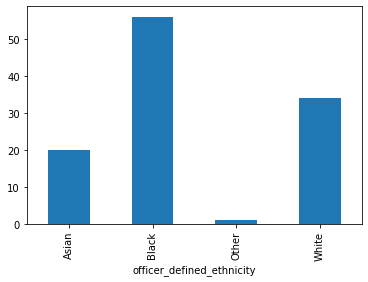

In [85]:
by_race.drop('None Given')['outcome'].plot(kind='bar')